# Mini Projet de MDI220 par Tristan PERROT

## Importation des librairies


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline


## Exercice 1

### Question 1

Importation et formation du vecteur des coût des accidents (strictement) avant l’accident de Three Mile Island (1979-03-28), en million dollars 2013 et supprimer toutes les observations (avec données) manquantes.
Vous devez obtenir n = 55 observations x1, ..., xn.


In [4]:
# 1. Importation des données
nuclearAccidents = pd.read_csv(open('NuclearPowerAccidents2016.csv'))

# 2. Filtre des données
nuclearAccidents['Date'] = pd.to_datetime(
    nuclearAccidents['Date'], format='%m/%d/%Y')
nuclearAccidents.dropna(subset='Cost (millions 2013US$)', inplace=True)

# 3. Création du vecteur des données
mask = nuclearAccidents['Date'] < '1979-03-28'
data = nuclearAccidents.loc[mask, 'Cost (millions 2013US$)']
data.describe()


count      55.000000
mean      726.336364
std      1405.912516
min         0.000000
25%        12.850000
50%        89.900000
75%       895.000000
max      8189.000000
Name: Cost (millions 2013US$), dtype: float64

### Question 2

#### Construction du QQ-plot pour la loi normale

**Montrons que la fonction quantile d'une loi normale $N(\mu, \sigma^2)$ notée $F^{-1}(p;\mu,\sigma^2)$ vérifie :**

$$\forall p \in ]0,1[, \quad F^{-1}(p;\mu,\sigma^2) = \mu + \sqrt{\sigma^2}F^{-1}(p;0,1)$$

Soit $p \in ]0,1[$,
La fonction de répartition de la loi normale notée $F(x)$ est définit par :
$$F(x) = \int_{-\infty}^x \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(t-\mu)^2}{2\sigma^2}}dt$$

On a donc :

$$
\begin{align*}
F^{-1}(p;\mu,\sigma^2) &\stackrel{\rm déf}{=} inf\{x: F(x) \geq p\} \\
&= inf\{x:\frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^{x}e^{-\frac{(t-\mu)^2}{2\sigma^2}}dt \geq p\} \\
&= inf\{x:\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\frac{x-\mu}{\sigma}}e^{-\frac{v^2}{2}}dv \geq p\} \\
&= inf\{\mu + \sigma x:\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-\frac{v^2}{2}}dv \geq p\} \\
&= \mu + \sigma*inf\{x:\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-\frac{t^2}{2}}dt \geq p\} \\
F^{-1}(p;\mu,\sigma^2) &= \mu + \sqrt{\sigma^2}F^{-1}(p;0,1) \quad \Box
\end{align*}
$$

**Traçons le QQ-plot pour la loi normale**


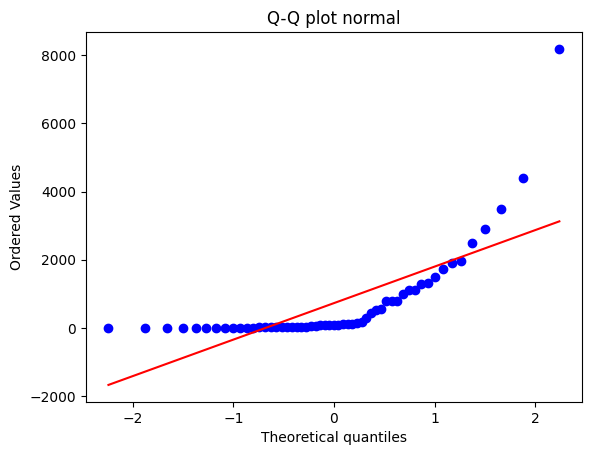

In [5]:
stats.probplot(data, plot=plt)
plt.title("Q-Q plot normal")
plt.show()


### Question 3

#### Construction du QQ-plot pour la loi exponentielle

**Montrons que la fonction quantile d'une loi exponentielle $\mathcal{E}(\lambda)$ notée $F^{-1}(p;\lambda)$ vérifie :**
$$\forall p \in ]0,1[, \quad F^{-1}(p;\lambda) = \frac{1}{\lambda}F^{-1}(p;1)$$

Soit $p \in ]0,1[$,
La fonction de répartition de la loi exponentielle notée $F(x)$ est définit par :

$$
F(x) = \begin{cases}\begin{align*}
1 - e^{-\lambda x} \quad &si \quad x \geq 0 \\
0 \quad &si \quad x < 0
\end{align*}\end{cases}
$$

Or on peut se restreindre à $x \geq 0$ car $F^{-1}(p;\lambda)$ est défini pour $p \in ]0,1[$.

Ainsi,

$$
\begin{align*}
F^{-1}(p;\lambda) &\stackrel{\rm déf}{=} inf\{x: F(x) \geq p\} \\
&= inf\{x:1 - e^{-\lambda x} \geq p\} \\
&= inf\{\frac{x}{\lambda}: 1 - e^{x} \leq p\} \\
F^{-1}(p;\lambda) &= \frac{1}{\lambda}F^{-1}(p;1) \quad \Box
\end{align*}
$$

**Traçons le QQ-plot pour la loi exponentielle**


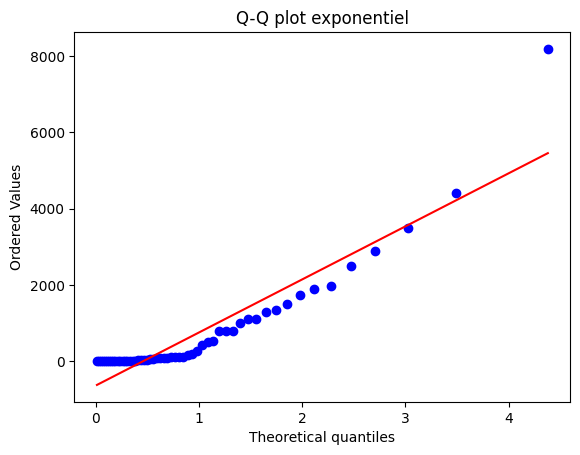

In [6]:
stats.probplot(data, dist='expon', plot=plt)
plt.title("Q-Q plot exponentiel")
plt.show()


### Question 4

Au vue des Q-Q plots obtenus, la loi qui semble être la plus plausible pour les données est la loi exponentielle. En effet, les points sont plus proches de la droite de régression que pour la loi normale.


## Exercice 2

### Question 1

**Calculons l'estimateur du maximum de vraisemblance $\hat{\lambda}$ pour le paramètre de la loi exponentielle $\lambda$.**\
La fonction de densité de la loi exponentielle est donnée par :

$$
p_\lambda(x) = \begin{cases}\begin{align*}
\lambda e^{-\lambda x} \quad &si \quad x \geq 0 \\
0 \quad &si \quad x < 0
\end{align*}\end{cases}
$$

Or les $X_i$ sont indépendantes et identiquement distribuées selon la loi exponentielle de paramètre $\lambda$ donc posons
$$L = p_\lambda(x_1, ..., x_n) = \prod_{i=1}^n \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda \sum_{i=1}^n x_i} $$

L'estimateur maximum de vraisemblance de $\lambda$ est donné par :
$$\forall x \in \mathbb{R} \quad \hat{\lambda}_n = \underset{\lambda \in \mathbb{R}^+}{\arg\!\sup}(L)$$

Ainsi,

$$
\begin{align*}
L &= \lambda^n e^{-\lambda \sum_{i=1}^n x_i} \\
\rm Ainsi, \quad \log_{}(L) &= n\log_{}(\lambda) -\lambda \sum_{i=1}^n x_i
\end{align*}
$$

Nous passons donc pour le log-vraisemblance en dérivant nous obtenons :

$$
\begin{align*}
\frac{\partial \log_{}(L)}{\partial \lambda} &= \frac{n}{\lambda} - \sum_{i=1}^n x_i \\
\frac{\partial \log_{}(L)}{\partial \lambda} &= 0 \Leftrightarrow \lambda = \frac{n}{\sum_{i=1}^n x_i} = \frac{1}{X}
\end{align*}
$$

Vérifions qu'il s'agit bien d'un maximum en calculant la seconde dérivée :

$$\frac{\partial^2 \log_{}(L)}{\partial \lambda^2} = - \frac{n}{\lambda^2} < 0 $$

Ainsi, sur tout son domaine de définition, $\log_{}(L)$ est donc strictement concave et la fonction $\log_{}$ est strictement croissante donc $L$ est bien strictement concave. De même, un maximum de $\log_{}(L)$ est un maximum de $L$.

On a donc bien $\hat{\lambda}_n = \underset{\lambda \in \mathbb{R}^+}{\arg\!\sup}(L) = \frac{n}{\sum_{i=1}^n x_i} \quad \Box$

### Question 2

**Traçons sur le même graphique l’histogramme de données (sur l’échelle de densité) et la densité de probabilité de la loi exponentielle avec le paramètre $\hat\lambda_n$**


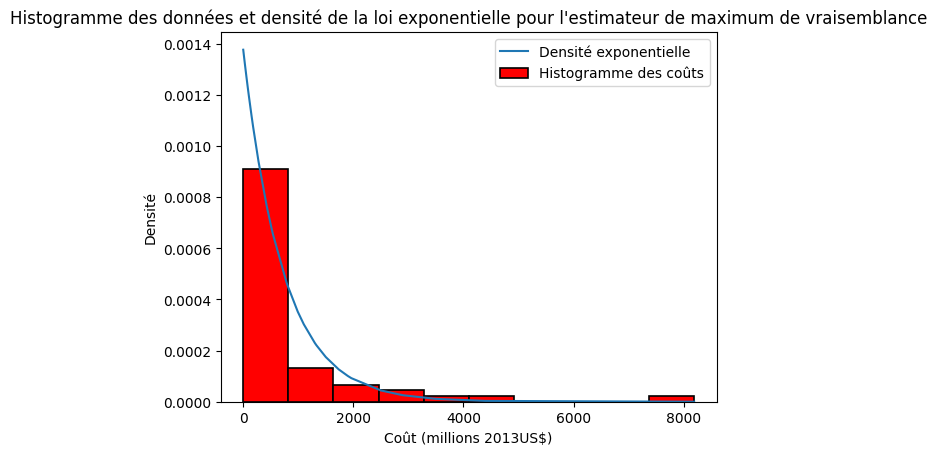

In [7]:
plt.hist(data, density=True, edgecolor='black', linewidth=1.2, color='red')

lambd = len(data) / data.sum()
plt.plot(data, stats.expon.pdf(data, scale=1/lambd))

plt.title("Histogramme des données et densité de la loi exponentielle pour l'estimateur de maximum de vraisemblance")
plt.xlabel("Coût (millions 2013US$)")
plt.ylabel("Densité")
plt.legend(['Densité exponentielle', 'Histogramme des coûts'])

plt.show()


### Question 3

Posons $g_1(\lambda) = \frac{1}{\lambda}$, le modèle $\{P_\lambda, \lambda > 0\}$ étant régulier (au sens des hypothèses du théorème du Cramer-Rao) la statistique $T_1(X) = \frac{1}{n}\sum_{i=1}^n X_i$ est un estimateur efficace pour $g_1(\lambda)$ s'il est sans biais et atteint la borne de Cramer-Rao.

**Montrons que $T_1$ est sans biais,**

$$
\begin{align*}
\mathbb{E}[T_1(X)] &= \mathbb{E}\left[\frac{1}{n}\sum_{i=1}^n X_i\right] \\
&= \frac{1}{n}\sum_{i=1}^n \mathbb{E}[X_i] \\
&= \frac{1}{n}\sum_{i=1}^n \frac{1}{\lambda} \\
\mathbb{E}[T_1(X)] &= \frac{1}{\lambda} \quad \Box
\end{align*}
$$

**Montrons maintenant que $T_1$ atteint la borne de Cramer-Rao (ie $\mathbb{Var}(T_1(X)) = \frac{g'_1(\lambda)^2}{I(\lambda)}$).**\
Les $X_i$ étant indépendantes et identiquement distribuées selon la loi exponentielle de paramètre $\lambda$, alors :

$$
\begin{align*}
\mathbb{Var}(T_1(X)) &= \mathbb{Var}\left(\frac{1}{n}\sum_{i=1}^n X_i\right) \\
&= \frac{1}{n^2}\sum_{i=1}^n \mathbb{Var}(X_i) \\
&= \frac{1}{n^2}\sum_{i=1}^n \frac{1}{\lambda^2} \\
\mathbb{Var}(T_1(X)) &= \frac{1}{n\lambda^2} \\

\text{De plus,} \quad g'_1(\lambda) &= -\frac{1}{\lambda^2} \\
\rm et \quad I(\lambda) &= \mathbb{Var}\left(\frac{\partial \log_{}(L)}{\partial \lambda}\right) \\
&= \mathbb{Var}\left(\frac{n}{\lambda} - \sum_{i=1}^n x_i\right) \quad \text{(cf q1)} \\
I(\lambda) &= \frac{n}{\lambda^2}
\end{align*}
$$

D'où $\mathbb{Var}(T_1(X)) = \frac{1}{n\lambda^2} = \frac{g'_1(\lambda)^2}{I(\lambda)}$ ce qui nous permet de conclure quand à l'atteinte de la borne de Cramer-Rao et donc de l'efficacité de $T_1$.

### Question 4

**Calcul de $g_1$ en utilisant $T_1$ l'échantillon donnée**


In [8]:
g1 = data.sum()/len(data)
print('g1 =', g1)


g1 = 726.3363636363637


### Question 5

**Soit $\eta > 0$, on considère le nouvel estimateur $\~T_{1,\eta} = \eta T_1(X)$. Montrons que pour certaines valeurs de $\eta$ ( que nous préciserons ), et pour le risque quadratique, on a :**
$$\forall \lambda > 0, \quad R\left(\lambda, \~T_{1,\eta}\right) < R\left(\lambda,T_1\right)$$

Soit $\lambda > 0$, $T_1(X)$ est sans biais donc $R(\lambda, T_1) = \mathbb{Var}(T_1(X)) = \frac{1}{n\lambda^2}$.\
Étudions $\~T_{1,\eta}$ :

$$
\begin{align*}
b\left(\lambda, \~T_{1,\eta}\right) &= \mathbb{E}\left[\eta T_1(X) - g(\lambda)\right] \\
&= \eta \mathbb{E}[T_1(X)] - \mathbb{E}\left[\frac{1}{\lambda}\right] \\
b\left(\lambda, \~T_{1,\eta}\right) &= \frac{\eta - 1}{\lambda} \\
\mathbb{Var}\left(\~T_{1,\eta}\right) &= \eta^2 \mathbb{Var}\left(T_1(X)\right) \\
\mathbb{Var}\left(\~T_{1,\eta}\right) &= \frac{\eta^2}{n\lambda^2}
\end{align*}
$$

Ainsi,

$$
\begin{align*}
R\left(\lambda, \~T_{1,\eta}\right) &= b\left(\lambda, \~T_{1,\eta}\right)^2 + \mathbb{Var}\left(\~T_{1,\eta}\right) \\
R\left(\lambda, \~T_{1,\eta}\right) &= \frac{(\eta - 1)^2}{\lambda^2} + \frac{\eta^2}{n\lambda^2} \\
\end{align*}
$$

On veut trouver les $\eta$ tels que $R\left(\lambda, \~T_{1,\eta}\right) < R(\lambda,T_1)$, (on supposera que $\eta \ne 1$ car sinon $T_1 = \~T_{1,\eta}$ et cela n'a plus d'intérêt) donc :

$$
\begin{align*}
\frac{(\eta - 1)^2}{\lambda^2} + \frac{\eta^2}{n\lambda^2} < \frac{1}{n\lambda^2} &\Leftrightarrow \frac{1}{n\lambda^2} - \frac{(\eta - 1)^2}{\lambda^2} - \frac{\eta^2}{n\lambda^2} > 0\\
&\Leftrightarrow 1 - n(\eta - 1)^2 - \eta^2 > 0\\
&\Leftrightarrow 1 - \eta^2 - n(\eta - 1)^22 > 0\\
&\Leftrightarrow (1 - \eta)(1 + \eta) > n(1 - \eta)^2\\
&\stackrel{\eta \ne 1}{\Leftrightarrow} \frac{1+\eta}{1-\eta} > n
\end{align*}
$$

Impossible si $\eta \geq 1$. De plus en inversant l'équation on obtient : $\eta > \frac{n - 1}{n + 1}$.\
Ainsi, $\forall \eta \in \left] \frac{n - 1}{n + 1}, 1 \right[$ on a bien $\forall \lambda > 0, \quad R\left(\lambda, \~T_{1,\eta}\right) < R(\lambda,T_1)$.\
Ce résultat n'est pas contradictoire avec la question précédente car $\~T_{1,\eta}$ est biaisé.

### Question 6

**Calculons pour quelle valeur de $\eta$ l'estimateur $\~T_{1,\eta}$ est l'estimateur sans biais de la médiane.**

La médiane d'une loi exponentielle de paramètre $\lambda$ est $\frac{ln(2)}{\lambda}$.\
Il nous faut donc,

$$
\begin{align*}
\mathbb{E}\left[\~T_{1,\eta}(X) - \frac{ln(2)}{\lambda}\right] = 0 &\Leftrightarrow \frac{\eta}{\lambda} - \frac{ln(2)}{\lambda} = 0\\
&\Leftrightarrow \eta = ln(2)\\
\end{align*}
$$

**Calculons cette estimateur pour l’échantillon donné et comparons le à la médiane empirique.**


In [9]:
median = np.log(2) / lambd
empirical_median = data.median()

print('Médiane théorique =', median)
print('Médiane empirique =', empirical_median)


Médiane théorique = 503.4580025927086
Médiane empirique = 89.9


### Question 7

Les risque pour $T_1$ et $\~T_{1,\eta}$ en tant qu'estimateur de $g_1(\lambda)$ sont respectivement (cf q5) : $\frac{1}{n\lambda^2}$ et $\frac{(\eta - 1)^2}{\lambda^2} + \frac{\eta^2}{n\lambda^2}$


In [10]:
n = len(data)
eta = np.log(2)

print((n-1)/(n+1) < eta < 1)


False


Ainsi, pour $\eta = ln(2)$, $\eta$ ne vérifie pas la condition donc nous pouvons en conclure que $T_1$ est plus efficace que $\~T_{1,\eta}$ $\left(R(T_1) < R\left(\~T_{1,\eta}\right)\right)$.


## Exercice 3

### Question 1

L'espérance d'une loi exponentielle est $\frac{1}{\lambda}$. Ainsi, On souhaite affirmer avec un faible risque d’erreur que le coût moyen d’un accident est inférieur à un milliard de dollars. Les données étant en million. L'hypothèse nulle est donc : $H_0 : \lambda_0 \geq 10^{-3}$ et l'hypothèse alternative est : $H_1 : \lambda_1 < 10^{-3}$

### Question 2

D'après le lemme de Neyman-Pearson, le test le plus puissant de niveau $\alpha$ est donné par :

$$
\frac{p_{\lambda_1}(x_1, ..., x_n)}{p_{\lambda_0}(x_1, ..., x_n)} \leq \kappa_\alpha
$$
Or,
$$\begin{align*}
\frac{p_{\lambda_1}(x_1, ..., x_n)}{p_{\lambda_0}(x_1, ..., x_n)} &= \left(\frac{\lambda_1}{\lambda_0}\right)^n e^{-(\lambda_1 - \lambda_0) \sum_{i=1}^n x_i} \
&= \left(\frac{\lambda_1}{\lambda_0}\right)^n e^{-(\lambda_1 - \lambda_0) n T(X)}
\end{align*}$$

Ce qui est une fonction croissante en $T(X)$ car $\lambda_1 > \lambda_0$ et $n \geq 0$. On rappelle qu'on a $H_0 : \lambda_0 \geq 10^{-3}$. Or, il existe $\kappa'_\alpha$ tel que $T(X) \geq \kappa'_\alpha$, c'est la zone de rejet.

Or, $T(X) \sim \Gamma(n,\frac{1}{n\lambda})$ car $T(X)$ est une somme indépendante et identiquement répartie de V.A. de loi exponentielle. ( cf fonction caractéristique ).

On a donc : $\alpha = \mathbb{P}_{\lambda_0}(T(X) \geq \kappa'_\alpha)$ alors $\kappa'_\alpha = q_{1-\alpha}^{\Gamma\left(n,\frac{1}{n\lambda}\right)}$

### Question 3

On calcule $T(X)$ et on applique le test obtenu à la question 2 pour $\alpha = 0.05$.

In [11]:
alpha = 0.05
n = len(data)
lambd = 1e-3
sqrtN = np.sqrt(n)

k = stats.gamma.ppf(q=1 - alpha, a=n, scale=1/(sqrtN*lambd))
T = sum(data)/n
print(f'k = {k}')
print(f'T = {T}')
print('T est-t-il inférieur est k ? :', T < k)
print('Donc T se trouve dans la zone d\'acceptation, alors on accepte H0 au niveau alpha = 0.05. On peut donc affirmer que le coût moyen d’accident est inférieur à un milliard de dollars') if T < k else print(
    'Donc T se trouve dans la zone de rejet, alors on rejette H0 au niveau alpha = 0.05. On ne peut donc affirmer que le coût moyen d’accident est inférieur à un milliard de dollars ')


k = 9134.071732579556
T = 726.3363636363636
T est-t-il inférieur est k ? : True
Donc T se trouve dans la zone d'acceptation, alors on accepte H0 au niveau alpha = 0.05. On peut donc affirmer que le coût moyen d’accident est inférieur à un milliard de dollars


**Calcul de la p-valeur**

In [12]:
p_value = 1 - stats.gamma.cdf(x=T, a=n , scale=1/(sqrtN*lambd))

print(f'La p-value est {p_value}')
print('Elle est supérieure à celle du niveau alpha = 0.05, ce qui confirme les résultats du test et affirme H0.')

La p-value est 1.0
Elle est supérieure à celle du niveau alpha = 0.05, ce qui confirme les résultats du test et affirme H0.


### Question 4

On rappelle que $T_1$ est défini par $\frac{1}{n}\sum_{i=1}^n X_i$ avec les $X_i$ indépendantes et identiquement réparties de loi exponentielle de paramètre $\lambda$. Alors $T_1 \sim \Gamma\left(n,\frac{1}{n\lambda}\right)$

Traçons la densité de probabilité de $T_1$ et indiquons la région du rejet au niveau $\alpha = 0.05$.

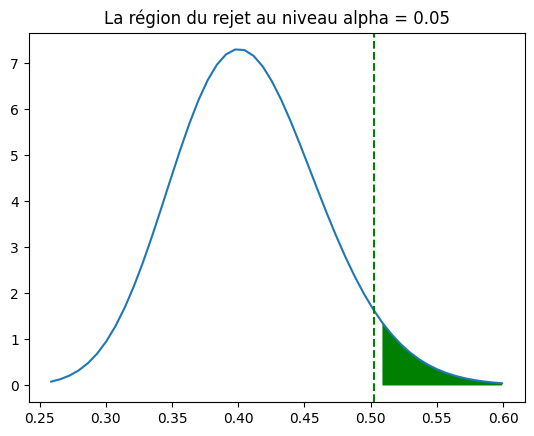

In [13]:
x = np.linspace(stats.gamma.ppf(0.001, a=n, scale=1/(sqrtN*lambd)),
                stats.gamma.ppf(0.999, a=n, scale=1/(sqrtN*lambd)))
y = stats.gamma.pdf(x=x, a=n, scale=1/(sqrtN*lambd))
k = stats.gamma.ppf(1 - alpha, a=n, scale=1/(sqrtN*lambd))
plt.plot(x, y)
plt.fill_between(x[x >= k], y[x >= k], facecolor='green')
plt.axvline(x=k, color="green", linestyle="--")
plt.title("La région du rejet au niveau alpha = 0.05")
plt.show()


### Question 5

Traçons la fonction puissance de test pour le niveau $\alpha$ en fonction de $\lambda$ pour l’échantillon de la taille $n = 10, 50, 100, 500, 100 000$.

La fonction puissance est la probabilité de rejeter sous l’hypothèse alternative $H_1$ : $h(\tilde{\lambda}) = \mathbb{P}\left[T ∈ \bar{A} \vert \lambda = \tilde{\lambda} \right]$ pour $\lambda \in \Lambda_{H_1}$ où $T$ est la statistique de test, $\bar{A}$ et la région de rejet, $\lambda$ est le paramètre à tester et $\Lambda_{H_1}$ à la région de l’hypothèse alternative. Ici, cela est donc $\mathbb{P}\left[T(X) \geq \kappa'_\alpha \vert \lambda = \tilde{\lambda} \right]$.

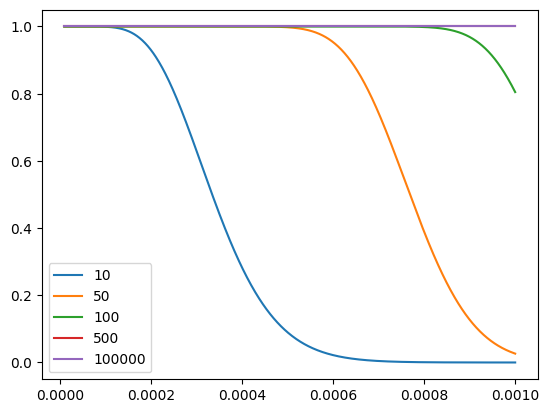

In [41]:
L = [10, 50, 100, 500, 100000]

x = np.linspace(1e-5, 1e-3, 1000)  # Nous nous intéressons à la zone de rejet

p = stats.gamma.ppf(1 - alpha, a=n, scale=1/(sqrtN*lambd))

for nl in L:
    y = 1 - stats.gamma.cdf(p, a=nl, scale=1/(np.sqrt(nl)*x))
    plt.plot(x, y, label=f'{nl}')
plt.legend()
plt.show()


On remarque donc que plus la taille de l'échantillon est grande, plus la puissance du test est grande. Les courbes se confondent à partir de $n \geq 500$ et la fonction puissance converge vers $1$ pour $\lambda = 10^{-3}$.

### Question 6

**En utilisant théorème centrale limite, donnons une approximation de la loi de T1 et proposons un nouveau test. Donnons ensuite le résultat de ce test.**

En appliquant le théorème centrale limite, nous pouvons affirmer que $\forall n \in \mathbb{N}$ assez grand $T_1 \sim \mathcal{N}\left(\frac{1}{\lambda}, \frac{1}{n\lambda^2}\right)$

On peut donc proposer un nouveau test : $T_1 \geq \kappa'_\alpha$ avec $\kappa'_\alpha = q_{1-\alpha}^{\mathcal{N}\left(\frac{1}{\lambda}, \frac{1}{n\lambda^2}\right)}$

On peut alors calculer la puissance de ce nouveau test pour $\lambda = 10^{-3}$

In [42]:
k = stats.norm.ppf(1 - alpha, loc=1/lambd, scale=1/(sqrtN*lambd))
print(f'k = {k}')
print(f'T = {T}')
print('T est-t-il inférieur est k ? :', T < k)
print('Donc T se trouve dans la zone d\'acceptation, alors on accepte H0 au niveau alpha = 0.05.') if T < k else print(
    'Donc T se trouve dans la zone de rejet, alors on rejette H0 au niveau alpha = 0.05.')

k = 1221.7920178125696
T = 726.3363636363636
T est-t-il inférieur est k ? : True
Donc T se trouve dans la zone d'acceptation, alors on accepte H0 au niveau alpha = 0.05.
